# SVM for Activity Recognition
This notebook implements and evaluates a Support Vector Machine (SVM) model for classifying activities from wearable sensor data. The objective is to compare the performance of SVM with the previously optimized Random Forest model and explore its effectiveness in handling high-dimensional data.


In [1]:
import numpy as np

# Load data
data_path = '../processed_data'  # Adjust the path as needed
X_train = np.load(f'{data_path}/X_train_features.npy')
X_test = np.load(f'{data_path}/X_test_features.npy')
y_train = np.load(f'{data_path}/y_train.npy')
y_test = np.load(f'{data_path}/y_test.npy')

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (6384, 360)
Test data shape: (2736, 360)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train linear SVM
svm_model_linear = SVC(kernel='linear', C=1, random_state=42)
svm_model_linear.fit(X_train, y_train)

# Evaluate the linear SVM
y_test_pred_svm_linear = svm_model_linear.predict(X_test)
print("Linear SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm_linear))
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_test_pred_svm_linear))


Linear SVM Test Accuracy: 0.9919590643274854

Classification Report (Linear SVM):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       1.00      1.00      1.00       144
           cycling_vertical       1.00      1.00      1.00       144
          descending_stairs       0.99      1.00      0.99       144
   exercising_cross_trainer       0.99      1.00      1.00       144
         exercising_stepper       1.00      1.00      1.00       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.93      0.92      0.92       144
         playing_basketball       0.99      0.99      0.99       144
                     rowing       1.00      1.00      1.00       144
      running_treadm

In [3]:
# Train RBF SVM
svm_model_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model_rbf.fit(X_train, y_train)

# Evaluate the RBF SVM
y_test_pred_svm_rbf = svm_model_rbf.predict(X_test)
print("RBF SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm_rbf))
print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_test_pred_svm_rbf))


RBF SVM Test Accuracy: 0.9700292397660819

Classification Report (RBF SVM):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       0.99      1.00      1.00       144
           cycling_vertical       1.00      0.98      0.99       144
          descending_stairs       0.97      1.00      0.98       144
   exercising_cross_trainer       1.00      1.00      1.00       144
         exercising_stepper       0.99      0.99      0.99       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.97      0.65      0.78       144
         playing_basketball       0.98      0.97      0.98       144
                     rowing       1.00      1.00      1.00       144
      running_treadmill_8k

In [5]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9871553884711779


In [6]:
# Train optimized SVM
optimized_svm = grid_search_svm.best_estimator_
y_test_pred_optimized_svm = optimized_svm.predict(X_test)

# Evaluate optimized SVM
print("Optimized SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_optimized_svm))
print("\nClassification Report (Optimized SVM):")
print(classification_report(y_test, y_test_pred_optimized_svm))


Optimized SVM Test Accuracy: 0.9926900584795322

Classification Report (Optimized SVM):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       1.00      1.00      1.00       144
           cycling_vertical       1.00      1.00      1.00       144
          descending_stairs       0.99      1.00      0.99       144
   exercising_cross_trainer       0.99      1.00      1.00       144
         exercising_stepper       1.00      1.00      1.00       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.98      0.88      0.93       144
         playing_basketball       0.99      0.99      0.99       144
                     rowing       1.00      1.00      1.00       144
      running_

In [8]:
# Print best parameters and cross-validation score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

# Use the best model for predictions
optimized_svm = grid_search_svm.best_estimator_
y_test_pred_optimized_svm = optimized_svm.predict(X_test)

# Evaluate the optimized model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Optimized SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_optimized_svm))
print("\nClassification Report (Optimized SVM):")
print(classification_report(y_test, y_test_pred_optimized_svm))


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9871553884711779
Optimized SVM Test Accuracy: 0.9926900584795322

Classification Report (Optimized SVM):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       1.00      1.00      1.00       144
           cycling_vertical       1.00      1.00      1.00       144
          descending_stairs       0.99      1.00      0.99       144
   exercising_cross_trainer       0.99      1.00      1.00       144
         exercising_stepper       1.00      1.00      1.00       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.98      0.88      0.93       144
         playing_basketball       0.99

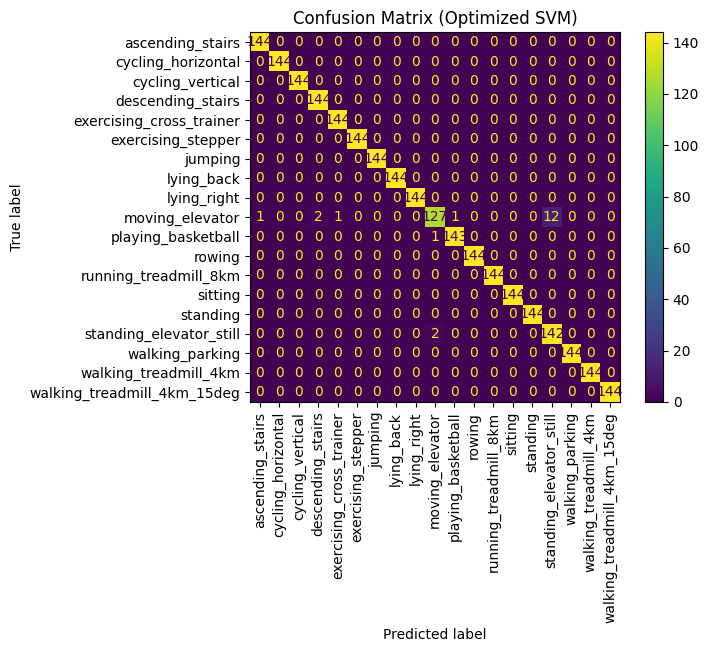

In [10]:
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_optimized_svm, labels=optimized_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimized_svm.classes_)

# Plot confusion matrix
disp.plot(cmap="viridis", xticks_rotation='vertical')
plt.title("Confusion Matrix (Optimized SVM)")
plt.show()


In [11]:
import joblib

# Save the optimized SVM model
svm_model_path = 'optimized_svm_model.pkl'
joblib.dump(optimized_svm, svm_model_path)
print(f"Optimized SVM model saved to {svm_model_path}")


Optimized SVM model saved to optimized_svm_model.pkl
